In [ ]:
%matplotlib inline

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

# Conjunto de datos

El conjunto de datos utilizados consiste en 21 variables de 721 Pokémon, que se pueden encontrar en Kaggle con el nombre "Pokémon for Data Mining and Machine Learning" [1]. Esta base de datos esta un poco desactualizada porque no contiene Pokémon de septima generación.

Los dos primeros datos son identificadores únicos del Pokémon, el número en el Pokédex y el nombre. De las 21 variables, 12 son numéricas (10 continuas y 2 discretas), 6 categóricas y 3 booleanas. A continuación se explica con detalle cada variable:
* Type_1. Tipo primario del Pokémon. Se relaciona la naturaleza, con su estilo de vida y con los movimientos que hace. Este valor categórico puede tomar 18 valores diferentes: Insecto, Oscuro, Dragón, Eléctrico, Hada, Lucha, Fuego, Volador, Fantasma, Planta, Tierra, Hielo, Normal, Veneno, Psíquico, Roca, Metal y Agua.
* Type_2. Algunos Pokémon pueden tener dos tipos.
* Total. La suma de todas las estadísticas de batalla base de un Pokémon. 
* HP. Base de puntos de salud de los Pokémon. Cuanto más grande sea, más tiempo podrán permanecer en batalla.
* Attack. Base de ataque de los Pokémon. Cuanto más grande sea, más daño causarán sus ataques.
* Defense. Base de defensa de los Pokémon. Cuanto más grande sea, tendrá mayor resistencia a ataques físicos.
* Sp_Atk. Base especial de ataque de los Pokémon. Cuanto más grande sea, más daño harán sus ataques especiales.
* Sp_Def. Base especial de defensa de los Pokémon. Cuanto más grande sea, tendrá mayor resistencia a ataques especiales.
* Speed. Velocidad base del Pokémon. La velocidad determina cual Pokémon ataca primero.
* Generation. Es un número entero entre 1 y 6 que determina el juego en que aparece por primera véz el Pokémon. 
* isLegendary. Booleano que indica si el Pokémon es legendario o no.
* Color. Color del Pokémon: Negro, azul, café, verde, gris, rosa, morado, rojo, blanco y amarillo.
* hasGender. Booleano que indica que los Pokémon pueden clasificarse como hombres o mujeres.
* Pr_Male. En caso de que el Pokémon tenga Género, la probabilidad de que sea masculino.
* Egg_Group_1. Valor categórico que indica el grupo de huevos del Pokémon: Amorfo, Insecto, Ditto, Dragón, Hada, Campo, Volar, Hierba, Humano, Mineral, Monstruo, Sin descubrir, Agua_1, Agua_2 y Agua_3.
* Egg_Group_2. Los Pokémon pueden pertenecer a dos grupos de huevos.
* hasMegaEvolution. Boolean indica si un Pokémon puede mega evolucionar o no.
* Height_m. Altura del Pokémon según el Pokédex, medido en metros.
* Weight_kg. Peso del Pokémon según el Pokédex, medido en kilogramos.
* Catch_Rate. Variable numérica que indica lo fácil que es atrapar un Pokémon. Está limitado entre 3 y 255.
* Body_Style. Estilo del cuerpo del Pokémon según la Pokédex. Existen 14 categorías de estilos de cuerpo: bipedal_tailed, bipedal_tailless, four_wings, head_arms, head_base, head_legs, head_only, insectoid, multiple_bodies, cuadruped, serpentine_body, several_limbs, two_wings, y with_fins.

In [56]:
input_file = "dataset/pokemon.csv"
pokemon_data = pd.read_csv(input_file, header = 0)
pokemon_data

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed
5,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,Red,True,0.875,Monster,Dragon,True,1.70,90.5,45,bipedal_tailed
6,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,Blue,True,0.875,Monster,Water_1,False,0.51,9.0,45,bipedal_tailed
7,8,Wartortle,Water,NaN,405,59,63,80,65,80,...,Blue,True,0.875,Monster,Water_1,False,0.99,22.5,45,bipedal_tailed
8,9,Blastoise,Water,NaN,530,79,83,100,85,105,...,Blue,True,0.875,Monster,Water_1,True,1.60,85.5,45,bipedal_tailed
9,10,Caterpie,Bug,NaN,195,45,30,35,20,20,...,Green,True,0.500,Bug,NaN,False,0.30,2.9,255,insectoid


# Regresión Lineal

Este ejemplo utiliza el peso y tamaño del pokemon.



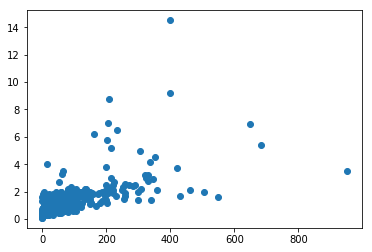

In [75]:
#plot original data
plt.scatter(pokemon_data['Weight_kg'],pokemon_data['Height_m'])
plt.show()

Coefficients: 
 [[0.00777724]]
Mean squared error: 0.28
Variance score: 0.61


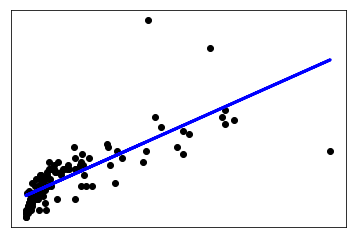

In [76]:
# Shuffle the data
reg_data = shuffle(pokemon_data)

# Divide data in training/testing 80/20
reg_data_X_train = pokemon_data.loc[:,'Weight_kg'].values[:-145].reshape(-1, 1)
reg_data_X_test = pokemon_data.loc[:,'Weight_kg'].values[-145:].reshape(-1, 1)
reg_data_Y_train = pokemon_data.loc[:,'Height_m'].values[:-145].reshape(-1, 1)
reg_data_Y_test = pokemon_data.loc[:,'Height_m'].values[-145:].reshape(-1, 1)

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(reg_data_X_train, reg_data_Y_train)

# Make predictions using the testing set
reg_data_Y_pred = regr.predict(reg_data_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(reg_data_Y_test, reg_data_Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(reg_data_Y_test, reg_data_Y_pred))

# Plot outputs
plt.scatter(reg_data_X_test, reg_data_Y_test,  color='black')
plt.plot(reg_data_X_test, reg_data_Y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Referencias
[1] Asier López Zorrilla. Pokémon for Data Mining https://www.kaggle.com/alopez247/pokemon. Last Accessed: 24/02/2019.